In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

### Загрузка датасет breast_cancer

In [2]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [3]:
X.shape

(569, 30)

### Выбераем два первых признака для уменьшения размерности задачи

In [4]:
X_2d = X[:, :2]
X_2d.shape

(569, 2)

### Разделение датасета на обучающую и тестовую выборки в пропорции 80-20.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=0)

### Построение классификатора на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01.

In [6]:
clf = SVC(C=0.01, kernel="rbf")
 
clf.fit(X_train, y_train)

print(f'Значение точности на обучающей выборке: {clf.score(X_train, y_train)}')
print(f'Значение точности на тестовой выборке: {clf.score(X_test, y_test)}')

Значение точности на обучающей выборке: 0.6923076923076923
Значение точности на тестовой выборке: 0.6666666666666666


### Вывод
Показатели точности сравнительно низкие

### Построение графической зависимости тестовой и обучающей точности от размера обучающей выборки

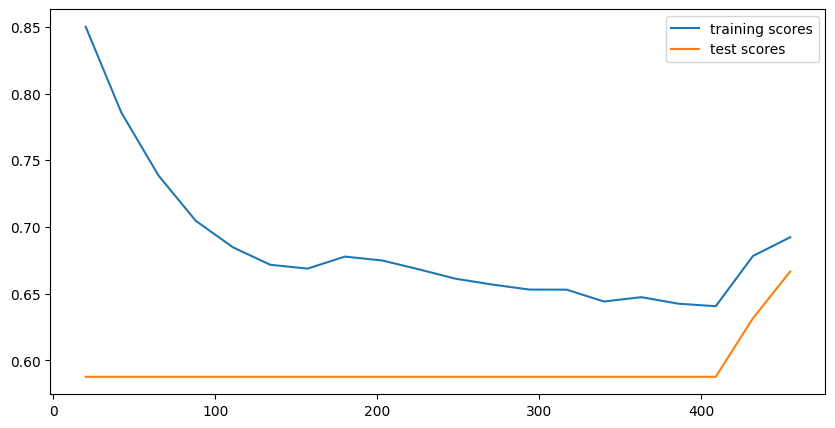

In [7]:
training_scores = []
test_scores = []
numbers = []
 
for i in np.linspace(20, len(X_train), 20):
    
    clf = SVC(C=0.01, kernel='rbf')
    X_tmp = X_train[:int(i)]
    y_tmp = y_train[:int(i)]
    clf.fit(X_tmp, y_tmp)
    
    numbers.append(int(i))
    training_scores.append(clf.score(X_tmp, y_tmp))
    test_scores.append(clf.score(X_test, y_test))
    
plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")
plt.show()

### Вывод

Т.к. точность модели на тестовой выборке маленькая, а также по причине роста точности на train и test scores при увеличение объема выборки можно сделать вывод, что модель недообучается. 

Стоит рассмотреть варианты, которые могут привести к увеличению точности модели, такие как:

1) добавить данные

2) добавить новые признаки в модель

3) Увеличить регуляризацию

### Попробуем увеличить регуляризацию. Для этого увеличим параметр C

In [8]:
for i in [0.01, 0.02, 0.25, 0.5]:
    clf = SVC(C=i, kernel="rbf")
     
    clf.fit(X_train, y_train)
    
    print(f'Score на train для C = {i}: {clf.score(X_train, y_train)}')
    print(f'Score на test для C = {i}: {clf.score(X_test, y_test)}\n')
    

Score на train для C = 0.01: 0.6923076923076923
Score на test для C = 0.01: 0.6666666666666666

Score на train для C = 0.02: 0.8703296703296703
Score на test для C = 0.02: 0.868421052631579

Score на train для C = 0.25: 0.9142857142857143
Score на test для C = 0.25: 0.8596491228070176

Score на train для C = 0.5: 0.9076923076923077
Score на test для C = 0.5: 0.8771929824561403



Как видим, при увеличении регуляризации точность и на train и на test раастет до 0.9, после чего слабо варьируется

### Попробуем добавить новые признаки в модель

In [9]:
train_scores = []
test_scores = []
numbers = []

for i in (2, 3, 4, 5):
    X_2d = X[:, :i]
    X_2d.shape
    
    X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=0)
    
    clf = SVC(C=0.01, kernel="rbf")
     
    clf.fit(X_train, y_train)
    
    numbers.append(i)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    
print(f'Score на train для {numbers} признаков: {train_scores}')
print(f'Score на test для {numbers} признаков: {test_scores}\n')

Score на train для [2, 3, 4, 5] признаков: [0.6923076923076923, 0.6373626373626373, 0.7824175824175824, 0.7714285714285715]
Score на test для [2, 3, 4, 5] признаков: [0.6666666666666666, 0.5877192982456141, 0.7543859649122807, 0.7543859649122807]



Можно увидеть, что по мере увеличения количества признаков наблюдается повышения скора

### Повторение предыдущего пункта для различных значений C в диапазоне от 0,0001 до 1 000 000. 


In [10]:
import numpy

In [11]:
%%time
train_scores = {}
test_scores = {}
numbers = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
 
for i in numbers:
    
    clf = SVC(C=i, kernel="rbf")
     
    clf.fit(X_train, y_train)
    
    train_scores[str(i)] = round(clf.score(X_train, y_train), 3)
    test_scores[str(i)] = round(clf.score(X_test, y_test), 3)
    
print(f'Score на train {train_scores}\n')
print(f'Score на test {test_scores}\n')


Score на train {'0.0001': 0.637, '0.001': 0.637, '0.01': 0.771, '0.1': 0.862, '1': 0.87, '10': 0.877, '100': 0.89, '1000': 0.897, '10000': 0.916, '100000': 0.923, '1000000': 0.927}

Score на test {'0.0001': 0.588, '0.001': 0.588, '0.01': 0.754, '0.1': 0.868, '1': 0.877, '10': 0.904, '100': 0.921, '1000': 0.904, '10000': 0.886, '100000': 0.895, '1000000': 0.93}

Wall time: 1.19 s


Значения, меньшие 1 дают недообучение, так как низкие показатели train и test выборки

Значения, большие 1000 дают переобучение, так как происходит уменьшение результата на test при увеличении на train

Оптимальные значения - около 100

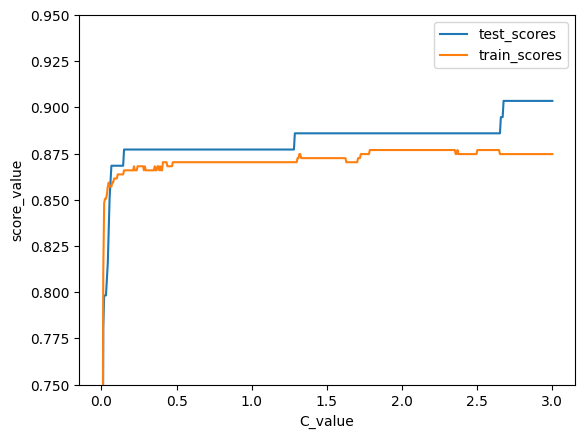

<Figure size 1000x500 with 0 Axes>

max score = 0.9035087719298246


In [12]:
data = np.linspace(0.0001, 3, 500)

test_scores = []
train_scores = []

for i in data:
    clf = SVC(C=i, kernel="rbf")

    clf.fit(X_train, y_train)

    test_scores.append(clf.score(X_test, y_test))
    train_scores.append(clf.score(X_train, y_train))

ax = plt.axes()
plt.figure(figsize=(10, 5))
ax.plot(data, test_scores, label="test_scores")
ax.plot(data, train_scores, label="train_scores")
ax.set_xlabel('С_value')
ax.set_ylabel('score_value')
ax.set_ylim([0.75, 0.95])
ax.legend(loc="best")
plt.show()
print(f'max score = {max(test_scores)}')

Глобально, при увеличении C наблюдается возрастание test и train score.
Однако начиная с определенного значения может произойти переобучение, тогда train score будет возрастать, а test уменьшаться

### Эмпирически находим лучшее значение C

In [13]:
results = []
for i in range(1,1000):
    value = i
    clf = SVC(kernel='rbf', C=value)
    clf.fit(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    train_acc = clf.score(X_train, y_train)
    results.append((value, test_acc, train_acc))
    
results.sort(key=lambda x: x[1], reverse=True)
print(results[0])

(98, 0.9210526315789473, 0.8901098901098901)


Таким образом, получаем оптимальное значение на test, равное 0.921 при C = 98

### Повторение двух предыдущих пунктов для метода опорных векторов с линейным ядром. 
### Сравнение получившихся результатов. 

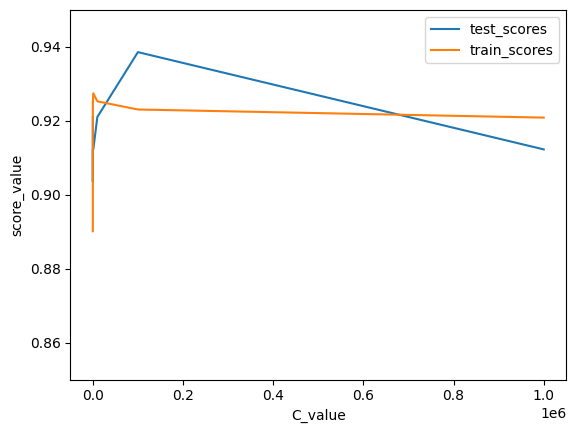

<Figure size 1000x500 with 0 Axes>

max score = 0.9385964912280702


In [16]:
data = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]

test_scores = []
train_scores = []

for i in data:
    clf = SVC(C=i, kernel="linear")

    clf.fit(X_train, y_train)

    test_scores.append(clf.score(X_test, y_test))
    train_scores.append(clf.score(X_train, y_train))

ax = plt.axes()
plt.figure(figsize=(10, 5))
ax.plot(data, test_scores, label="test_scores")
ax.plot(data, train_scores, label="train_scores")
ax.set_xlabel('С_value')
ax.set_ylabel('score_value')
ax.set_ylim([0.85, 0.95])
ax.legend(loc="best")
plt.show()
print(f'max score = {max(test_scores)}')

На графике хорошо видно, что с определенного момента test_score начинает падать в то время как train остается стабильно высоким. Это и есть переобучение

In [20]:
results = []
for value in range(1,100):
    clf = SVC(kernel='linear', C=value)
    clf.fit(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    train_acc = clf.score(X_train, y_train)
    results.append((value, test_acc, train_acc))
    
results.sort(key=lambda x: x[1], reverse=True)
print(results[0])

(28, 0.9298245614035088, 0.9252747252747253)


## Вывод
Методы показали практически идентичные результаты по точности. Однако последний метод имеет более долгий процесс выполнения